# Data Analysis with Python: Cyber attacks
# Benjamin Rosendahl, November 2024

## Aims and projectives
The database "cyber" (source: Kaggle) lists cyber attacks by date and time, (attacked) country, attack type, severity level, action taken etc.
Using Python with the pandas, numpy, seaborn and madpotlib libraries, I will try to map the cyber attacks as follows:
- by country
- by month and year
- by attack type
- by severity level
- by action taken

## Research questions
- Which countries are attacked the most, which the least, and why?
- What is the average number of attack per time, per country and combined?
- What is the average severity level per attack type, country, per month, per year? What is the standard deviation?
- What is the median severity level per attack type, country, per month, per year? What is the standard deviation?
- When (year and month) do cyber attacks occur more frequently, when less?
- At what times and where is the severity level the highest?
- Are different countries attacked at different times, by different attack types and at different severity level?

## Assumptions
- The more advanced the country is, the higher is the number and severity level of the attack
- Different countries are attacked by different type of cyber attacks, according to their infrastructure (for example, cell phone network)
- There are regular high and low peak times for attacks (for example, summer - low, because of vacation, winter - high, because of larger amount of time spent indoors in front of computers)
- There are irregular peaks for attacks (for example, 2020 - Corona, everybody stayed at home, and face-to-face meetings where converted to Zoom meetings, meaning more exposure)
- Different actions are taken against different types of attacks, different levels of attacks and different countries    

### Importing relevant libraries and uploading database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cyber = pd.read_csv("CYBER.csv")

### Basic analysis of data

In [3]:
# Names of columns and datatypes
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Malware Indicators      20000 non-null  object 
 10  Anomaly Scores          40000 non-null  float64
 11  Alerts/Warnings         19933 non-null  object 
 12  Attack Type             40000 non-null  object 
 13  Attack Signature        40000 non-null  object 
 14  Action Taken            40000 non-null

In [4]:
## top 5 rows
cyber.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,country,Proxy Information,Firewall Logs,IDS/IPS Alerts,LA1:X1108og Source
0,5/30/2023 6:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,IoC Detected,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,China,150.9.97.135,Log Data,NaN,Server
1,8/26/2020 7:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,Germany,NaN,Log Data,NaN,Firewall
2,11/13/2022 8:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,IoC Detected,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,Taiwan,114.133.48.179,Log Data,Alert Data,Firewall
3,7/2/2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,NaN,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,United States,NaN,NaN,Alert Data,Firewall
4,7/16/2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,NaN,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,France,149.6.110.119,NaN,Alert Data,Firewall


In [5]:
##bottom 5 rows
cyber.tail()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,country,Proxy Information,Firewall Logs,IDS/IPS Alerts,LA1:X1108og Source
39995,5/26/2023 14:08,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,IoC Detected,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,China,NaN,Log Data,Alert Data,Firewall
39996,3/27/2023 0:38,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,IoC Detected,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,Paraguay,60.51.30.46,Log Data,NaN,Firewall
39997,3/31/2022 1:45,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,IoC Detected,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,China,NaN,Log Data,Alert Data,Server
39998,9/22/2023 18:32,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,IoC Detected,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,China,137.76.130.8,Log Data,NaN,Server
39999,10/10/2023 11:59,14.102.21.108,109.198.45.7,50137,55575,ICMP,1175,Control,HTTP,NaN,...,Logged,Medium,Zaina Kumar,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,Segment A,China,112.169.115.139,Log Data,Alert Data,Firewall


### Detailled and more specific analysis of data

In [6]:
# choice of relevant columns - as copy, in order not to affect original dataframe
cyber_data = cyber [["Timestamp", "Attack Type", "country", "Severity Level", "Action Taken", "Device Information"]].copy()

In [7]:
cyber_data

,Timestamp,Attack Type,country,Severity Level,Action Taken,Device Information
0,5/30/2023 6:33,Malware,China,Low,Logged,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...
1,8/26/2020 7:08,Malware,Germany,Low,Blocked,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...
2,11/13/2022 8:23,DDoS,Taiwan,Low,Ignored,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
3,7/2/2023 10:38,Malware,United States,Medium,Blocked,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...
4,7/16/2023 13:11,DDoS,France,Low,Blocked,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...
...,...,...,...,...,...,...
39995,5/26/2023 14:08,DDoS,China,Medium,Logged,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...
39996,3/27/2023 0:38,DDoS,Paraguay,High,Logged,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....
39997,3/31/2022 1:45,DDoS,China,Low,Blocked,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...
39998,9/22/2023 18:32,Malware,China,Low,Ignored,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....


#### Data manipulation: Timestamp
- format change (from timestamp to datetime)
- assigning new format to dataframe
- adding year and month as separate categories

In [8]:
## transform of timestamp format to datetime format
pd.to_datetime (cyber_data["Timestamp"])

0       2023-05-30 06:33:00
1       2020-08-26 07:08:00
2       2022-11-13 08:23:00
3       2023-07-02 10:38:00
4       2023-07-16 13:11:00
                ...        
39995   2023-05-26 14:08:00
39996   2023-03-27 00:38:00
39997   2022-03-31 01:45:00
39998   2023-09-22 18:32:00
39999   2023-10-10 11:59:00
Name: Timestamp, Length: 40000, dtype: datetime64[ns]

In [9]:
## assigning datetime for Timestamp column
cyber_data["Timestamp"] = pd.to_datetime (cyber_data["Timestamp"])

In [10]:
## check that assignment was successful
cyber_data ["Timestamp"]

0       2023-05-30 06:33:00
1       2020-08-26 07:08:00
2       2022-11-13 08:23:00
3       2023-07-02 10:38:00
4       2023-07-16 13:11:00
                ...        
39995   2023-05-26 14:08:00
39996   2023-03-27 00:38:00
39997   2022-03-31 01:45:00
39998   2023-09-22 18:32:00
39999   2023-10-10 11:59:00
Name: Timestamp, Length: 40000, dtype: datetime64[ns]

In [11]:
#year
cyber_data ["Timestamp"].dt.year.unique()

array([2023, 2020, 2022, 2021], dtype=int32)

In [12]:
#separate column: year
cyber_data ["Year"] = cyber_data ["Timestamp"].dt.year

In [13]:
# separate column: month
cyber_data ["Month"] = cyber_data ["Timestamp"].dt.month

In [14]:
#separate column: day
cyber_data ["Day"] = cyber_data ["Timestamp"].dt.day

In [15]:
#checking that separate date type columns were added
cyber_data

,Timestamp,Attack Type,country,Severity Level,Action Taken,Device Information,Year,Month,Day
0,2023-05-30 06:33:00,Malware,China,Low,Logged,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,2023,5,30
1,2020-08-26 07:08:00,Malware,Germany,Low,Blocked,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,2020,8,26
2,2022-11-13 08:23:00,DDoS,Taiwan,Low,Ignored,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,2022,11,13
3,2023-07-02 10:38:00,Malware,United States,Medium,Blocked,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,2023,7,2
4,2023-07-16 13:11:00,DDoS,France,Low,Blocked,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,2023,7,16
...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:00,DDoS,China,Medium,Logged,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,2023,5,26
39996,2023-03-27 00:38:00,DDoS,Paraguay,High,Logged,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,2023,3,27
39997,2022-03-31 01:45:00,DDoS,China,Low,Blocked,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,2022,3,31
39998,2023-09-22 18:32:00,Malware,China,Low,Ignored,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,2023,9,22


## Aggregations and statistical analysis

### Number and average of cyber attacks by year, country, attack type 

#### Number of attacks by year

In [16]:
# number of attacks by year
cyber_data.groupby (["Year"])["Attack Type"].count()

Year
2020    10573
2021    10538
2022    10750
2023     8139
Name: Attack Type, dtype: int64

#### Number of attacks by month

In [17]:
cyber_data.groupby (["Year", "Month"])["Attack Type"].count()

Year  Month
2020  1        814
      2        830
      3        906
      4        825
      5        904
      6        889
      7        880
      8        904
      9        877
      10       905
      11       915
      12       924
2021  1        858
      2        788
      3        902
      4        865
      5        874
      6        929
      7        904
      8        898
      9        909
      10       891
      11       869
      12       851
2022  1        883
      2        807
      3        925
      4        884
      5        909
      6        928
      7        950
      8        905
      9        843
      10       897
      11       919
      12       900
2023  1        823
      2        807
      3        945
      4        847
      5        908
      6        863
      7        889
      8        908
      9        853
      10       296
Name: Attack Type, dtype: int64

In [18]:
cyber_sh = cyber_data.groupby (["Year", "Month"])["Attack Type"].count().to_frame

In [19]:
cyber_sh

<bound method Series.to_frame of Year  Month
2020  1        814
      2        830
      3        906
      4        825
      5        904
      6        889
      7        880
      8        904
      9        877
      10       905
      11       915
      12       924
2021  1        858
      2        788
      3        902
      4        865
      5        874
      6        929
      7        904
      8        898
      9        909
      10       891
      11       869
      12       851
2022  1        883
      2        807
      3        925
      4        884
      5        909
      6        928
      7        950
      8        905
      9        843
      10       897
      11       919
      12       900
2023  1        823
      2        807
      3        945
      4        847
      5        908
      6        863
      7        889
      8        908
      9        853
      10       296
Name: Attack Type, dtype: int64>

#### Number of attacks by country

In [20]:
cyber_data.groupby (["country"])["Attack Type"].count()

country
Albania        12
Algeria         8
Angola          2
Argentina     129
Armenia        10
             ... 
Uzbekistan      8
Venezuela      91
Vietnam       254
Zambia          2
Zimbabwe        2
Name: Attack Type, Length: 126, dtype: int64

In [21]:
##Sorted from most attacks to least attacks
cyber_data.groupby (["country"])["Attack Type"].count().sort_values(ascending = False)

country
China                       16393
United States                8363
Taiwan                       1294
Japan                        1247
South Korea                  1130
                            ...  
Lebanon                         1
Mali                            1
Northern Mariana Islands        1
Nepal                           1
Suriname                        1
Name: Attack Type, Length: 126, dtype: int64

In [22]:
##50 most attacked countries
cyber_data.groupby (["country"])["Attack Type"].count().sort_values(ascending = False).head(50)

country
China                   16393
United States            8363
Taiwan                   1294
Japan                    1247
South Korea              1130
Russia                   1035
Canada                    892
Germany                   712
Brazil                    569
India                     541
Netherlands               533
Hong Kong                 528
France                    485
Sweden                    365
Ukraine                   365
United Kingdom            296
Vietnam                   254
Spain                     246
Iran                      245
Turkey                    237
Australia                 221
Romania                   220
Thailand                  216
Bulgaria                  205
Poland                    203
Singapore                 201
Italy                     192
Indonesia                 163
Argentina                 129
Philippines               111
Iceland                   109
Lithuania                 102
United Arab Emirates       98
Ma

#### Statistics on cyber attacks per country

In [23]:
c = cyber_data.groupby (["country"])["Attack Type"].count().sort_values(ascending = False)
c.describe()

count      126.000000
mean       314.507937
std       1638.468747
min          1.000000
25%          5.000000
50%         14.500000
75%        101.000000
max      16393.000000
Name: Attack Type, dtype: float64

 #### Statistics on cyber attacks per time period (month and year)

In [24]:
t = cyber_data.groupby (["Year", "Month"])["Attack Type"].count()
t.describe()

count     46.000000
mean     869.565217
std       94.602949
min      296.000000
25%      854.250000
50%      890.000000
75%      907.500000
max      950.000000
Name: Attack Type, dtype: float64

#### Statistics on cyber attacks per country

In [25]:
comb =  cyber_data.groupby (["country", "Year", "Month"])["Attack Type"].count()
comb.describe

<bound method NDFrame.describe of country   Year  Month
Albania   2020  2        1
                7        1
                12       1
          2021  5        1
                7        1
                        ..
Vietnam   2023  10       1
Zambia    2022  9        1
          2023  4        1
Zimbabwe  2022  6        1
          2023  8        1
Name: Attack Type, Length: 2618, dtype: int64>

#### Statistics on cyber attacks per attack type

- attack type per country (descending, top 50)

In [26]:
at = cyber_data.groupby (["Attack Type", "country"])["country"].count().sort_values(ascending = False).head(50)

In [27]:
at

Attack Type  country       
Malware      China             5523
DDoS         China             5468
Intrusion    China             5402
DDoS         United States     2868
Intrusion    United States     2770
Malware      United States     2725
Intrusion    Taiwan             450
DDoS         Taiwan             434
Intrusion    Japan              430
Malware      Taiwan             410
             Japan              409
DDoS         Japan              408
             South Korea        395
Intrusion    South Korea        374
Malware      South Korea        361
DDoS         Russia             350
Malware      Russia             344
Intrusion    Russia             341
DDoS         Canada             309
Malware      Canada             308
Intrusion    Canada             275
Malware      Germany            254
DDoS         Germany            233
Intrusion    Germany            225
DDoS         Brazil             198
Malware      India              196
             Brazil             190


## Visualization

### Attacks by month and year

[Text(0.5, 1.0, 'Cyber attacks by year and month')]

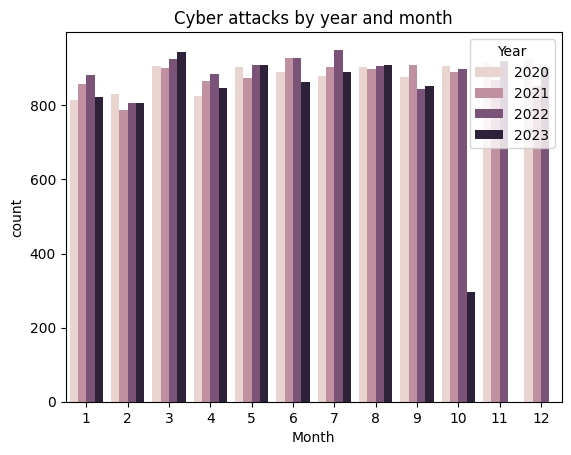

In [28]:
sns.countplot (data=cyber_data, x="Month", hue="Year").set(title="Cyber attacks by year and month")

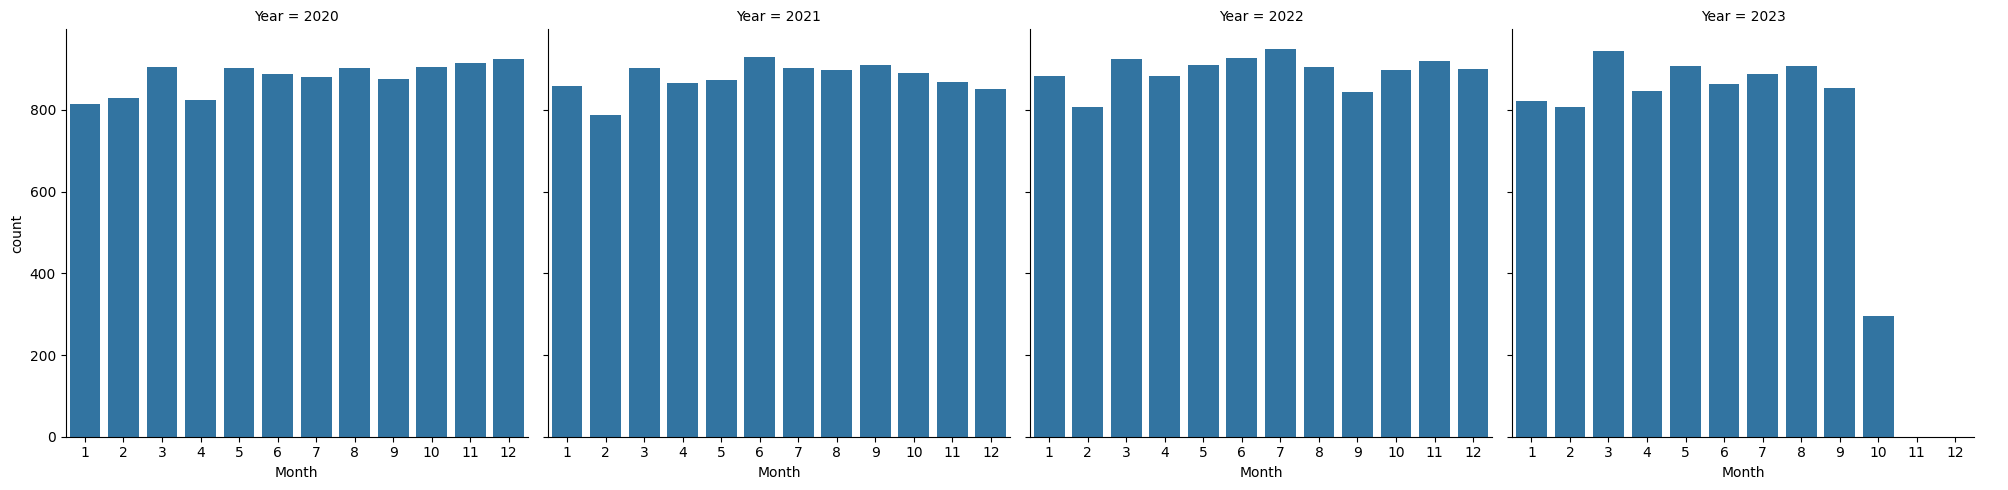

In [29]:
#Same data, presented in 4 graphs, each by year
sns.catplot (data=cyber_data, x="Month", col="Year", kind = "count")

### Attacks types by year

[Text(0.5, 1.0, 'Attack Types according to year')]

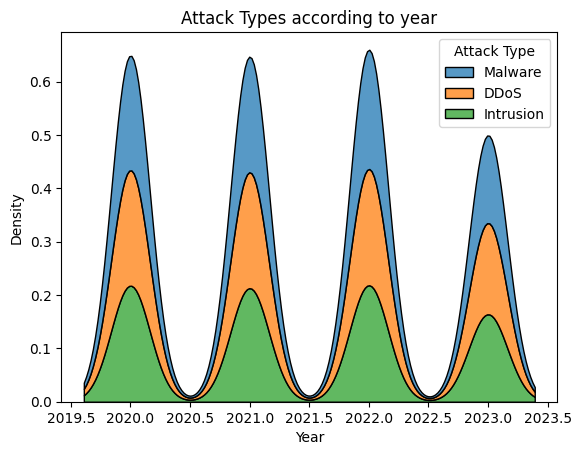

In [30]:
sns.kdeplot(data=cyber_data, x="Year", hue="Attack Type", multiple="stack").set(title="Attack Types according to year")

### Attacks by country

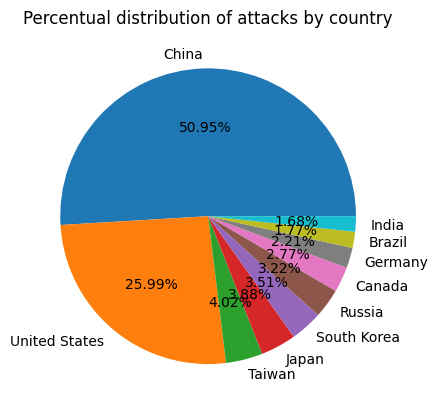

In [31]:
#Pie chart of 10 most attacked countries, in percentage
mask=cyber.groupby("country")["Attack Type"].count().sort_values(ascending = False).head(10)
plt.pie(mask,labels=mask.index, autopct="%1.2f%%")
plt.title("Percentual distribution of attacks by country")
plt.show()

### Attacks by attack types

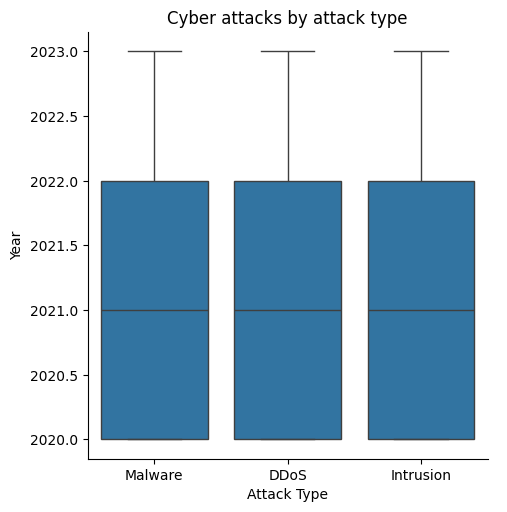

In [32]:
sns.catplot(data=cyber_data, x="Attack Type", y="Year", kind="box").set(title="Cyber attacks by attack type")


## Conclusions

## Answer to research questions and check with assumptions

### Which countries are attacked the most, which the least, and why?

China                   16393
United States            8363
Taiwan                   1294
Japan                    1247
South Korea              1130
Russia                   1035
Canada                    892
Germany                   712
Brazil                    569
India                     541

The assumption that the more advanced the country is (in particular, regarding internet infrastructure), the higher is the number and severity level of the attack - was correct. Therefore, China, the US and European countries are on top of the list, countries like Mali and Nepal on the bottom.
  

### What is the average number of attack per time, per country and combined?

The distribution over the years was very similar and - unlike the assumption - there was NO significant increase in 2020 (Corona year). Regarding the months, there are peaks (March and July) and months with lower number of cyber attacks (particularly February), but not very significantly.

### Statistical information

- Out of the 10 most attacked countries, more than 50% of attacks were on China (see graph), followed by the United States with 25%. The remaining 25% were split between 3 more Asian countries, Brasil, Canada, Russia, Germany and India.

- Attack types (Malware, DDoS Attack Type, Intrusion) are distributed evenly.

- On average, there were 314 attacks by country, and 870 per year. However, the standard deviation is unusual high, which means that this data might not be accurate. 